# Exercício 1

Considere, no espaço $\mathbb{R}^2$, as normas euclidiana $||.||_2$, da soma $||.||_1$ e do máximo $||.||_\infty$. Determine, geometricamente, para cada uma dessas normas, o conjunto $B=\{x\in \mathbb{R}^2 / ||x||=1\}$.




### **Exemplos de normas do $\mathbb{R}^n$**

- $$\|\mathbf{x}\|_2 = \bigg( \sum_{i=1}^n |x_i|^2 \bigg)^{1/2}, \qquad $$
- $$ \|\mathbf{x}\|_\infty = \max \limits _{1 \leq i \leq n} | x_{i} |, \qquad $$
- $$ \|\mathbf{x}\|_1 = \sum _{i=1} ^n | x_{i} | $$

- $$\|\mathbf{x}\|_p = \bigg( \sum_{i=1}^n |x_i|^p \bigg)^{1/p}, \; p \geq 1$$

- Esfera com centro na origem e raio unitário.
$$S = \{\mathbf{x} \in \mathbb{R}^n; \; \|\mathbf{x}\|=1\}$$


In [31]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-1.5, 1.5, 400)
x2 = np.linspace(-1.5, 1.5, 400)
X1, X2 = np.meshgrid(x1, x2)

def plotar(F):
    plt.contour(X1, X2, F, levels=[1], colors='red')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.gca().set_aspect('equal')
    plt.grid(True)
    plt.show()

- $$\|\mathbf{x}\|_2 = \sqrt{x_1^2 + x_2^2} = 1$$

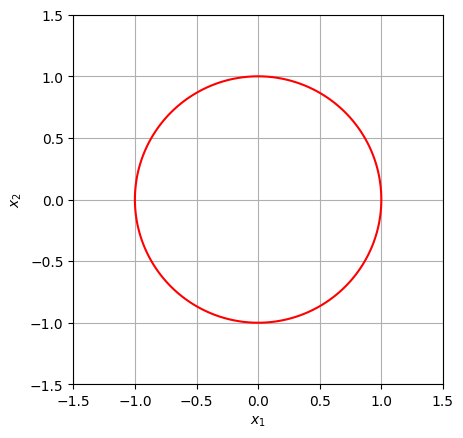

In [32]:
plotar(np.sqrt((X1)**2 + (X2)**2))

- $$\|\mathbf{x}\|_1 = |x_1| + |x_2| = 1$$

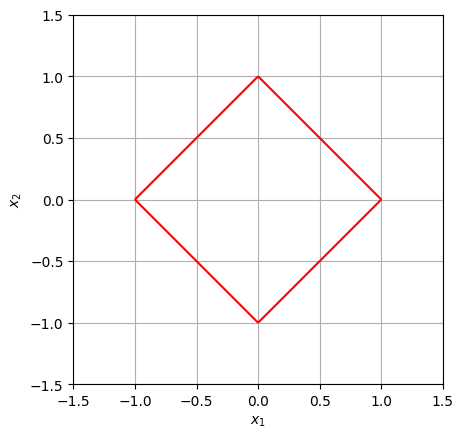

In [33]:
plotar(np.abs(X1) + np.abs(X2))

- $$ \|\mathbf{x}\|_\infty = \max ( | x_{1} |, | x_{2} |) = 1 \qquad $$

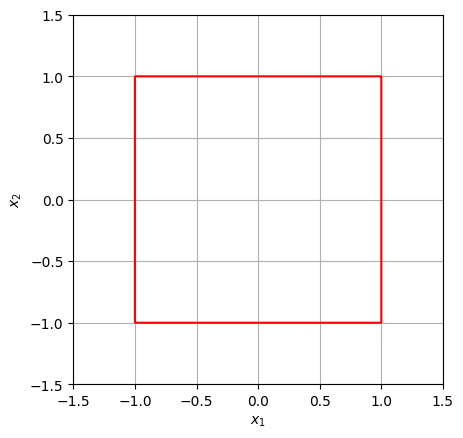

In [34]:
plotar(np.maximum(np.abs(X1), np.abs(X2)))

# Exercício 2
Considere uma base $B =  \{\mathbf{v}_1,\ldots,\mathbf{v}_{10}\}$ do $\mathbb{R}^{10}$ gerada pelo código abaixo. Implemente um código do processo de ortogonalização de Gram-Schmidt e obtenha uma base ortonormal do $\mathbb{R}^{10}$ a partir de $B$.

In [50]:
import numpy as np

# Garantir reprodutibilidade
np.random.seed(42)

# Começar com a matriz identidade
I = np.identity(10, dtype=int)

# Adicionar pequenas perturbações inteiras para evitar vetores ortogonais triviais
perturbation = np.random.randint(-3, 4, size=(10, 10))  # valores entre -3 e 3
B_int = I + perturbation

# Verificar se os vetores são linearmente independentes
rank = np.linalg.matrix_rank(B_int)
if rank == 10:
    # Imprimir vetores
    for i in range(10):
        print(f"v{i+1} = {B_int[:, i]}")
else:
    print("Os vetores não são linearmente independentes. Tente novamente.")

# Implementação do processo de Gram-Schmidt
def gram_schmidt(basis_vectors):
    """
    Aplica o processo de ortogonalização de Gram-Schmidt
    para obter uma base ortonormal
    """
    n = len(basis_vectors)
    u_vectors = []  # Vetores ortogonalizados
    q_vectors = []  # Vetores ortonormais
    
    # Primeiro vetor
    u1 = basis_vectors[0]
    q1 = u1 / np.linalg.norm(u1)
    u_vectors.append(u1)
    q_vectors.append(q1)
    
    # Processo para os demais vetores
    for i in range(1, n):
        # Começa com o vetor original
        u_i = basis_vectors[i].astype(float)
        
        # Subtrai as projeções nos vetores já ortogonalizados
        for j in range(i):
            proj = np.dot(u_i, q_vectors[j]) * q_vectors[j]
            u_i = u_i - proj
        
        u_vectors.append(u_i)
        q_i = u_i / np.linalg.norm(u_i)
        q_vectors.append(q_i)
    
    return q_vectors

# Aplicar Gram-Schmidt
q_vectors = gram_schmidt(B_int)
Q = np.column_stack(q_vectors)

print('\n\n')
# Verificar se os vetores são linearmente independentes
rank = np.linalg.matrix_rank(Q)
if rank == 10:
    print(np.round(Q, 2))
else:
    print("Os vetores não são linearmente independentes. Tente novamente.")

if np.allclose(Q.T @ Q, np.eye(Q.shape[1])):
    print("A base é ortonormal")
else:
    print("A base NÃO é ortonormal")

# # Verificar se os vetores são unitários
print(f"\nNormas dos vetores ortonormais:")
for i in range(10):
    norm = np.linalg.norm(q_vectors[i])
    print(f"q{i+1}: ||q|| = {norm:.10f}")

v1 = [ 4  3  2  0  2  1  2  0  0 -2]
v2 = [ 0  0  2 -3  2 -1 -2  3 -2 -2]
v3 = [ 1 -1 -1 -3  3  3 -2  0  2  0]
v4 = [ 3  1  0  0  2  1 -3  1  2 -2]
v5 = [-1  0  1 -1  0 -3 -2  3  2 -2]
v6 = [ 1 -1 -3  3  0  4  1 -1 -2  2]
v7 = [ 1  2  0 -2  3 -2 -1  2  0  0]
v8 = [ 3  1 -2  0  0  0  0 -2  2  2]
v9 = [-2 -2  2  0 -3 -3  0  0  2  3]
v10 = [-1  0  1  3 -1  0  3 -2  3  4]



[[ 0.61  0.31  0.44  0.24 -0.01  0.29  0.22  0.28  0.21  0.16]
 [ 0.    0.    0.45 -0.35  0.24 -0.07  0.08  0.28 -0.46 -0.57]
 [ 0.15 -0.48  0.1  -0.5   0.36  0.17  0.29 -0.28  0.4   0.1 ]
 [ 0.46 -0.17  0.23  0.11  0.2  -0.42 -0.6  -0.31 -0.12  0.11]
 [-0.15  0.16  0.09 -0.14 -0.   -0.48 -0.18  0.36  0.7  -0.21]
 [ 0.15 -0.48 -0.35  0.35  0.34 -0.18  0.16  0.56 -0.09  0.05]
 [ 0.15  0.48 -0.24 -0.35  0.22 -0.46  0.34 -0.02 -0.22  0.39]
 [ 0.46 -0.17 -0.22 -0.05 -0.58 -0.27  0.31 -0.17  0.01 -0.41]
 [-0.3  -0.31  0.55  0.12 -0.33 -0.36  0.3   0.02 -0.1   0.39]
 [-0.15  0.16  0.09  0.53  0.4  -0.18  0.37 -0.45  0.13 -0.